In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical ## specific  one I wanna use
from tensorflow.keras import utils
#from tensorflow.keras.layers import Input, Dense, Dropout  # Specific ones I wanna use, can just import whole module
from tensorflow.keras import layers 
from tensorflow.keras.models import Model



In [2]:
import h5py
#import tables
import matplotlib.pyplot as plt
#import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

True

In [4]:
x=1
y=3
x+y

4

In [5]:
# with h5py.File('DF_all_variables_Multi_manipulated.h5', 'w') as f:
#     f.create_dataset('dataset_name', data=df_total)

# Load the HDF5 file
with h5py.File('DF_all_variables_Multi_manipulated.h5', 'r') as f:
    # Access the dataset by name and load it into a pandas dataframe
    df_total = pd.DataFrame(f['dataset_name'][:])

# df column headers
column_names = ['dataset', 'DiJet_mass', 'HT', 'InputMet_InputJet_mindPhi',
       'InputMet_pt', 'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_pt', 'boostedTop_area', 'boostedTop_eta',
       'boostedTop_mass', 'boostedTop_pt', 'boostedTop_tag', 'boostedV_area',
       'boostedV_eta', 'boostedV_mass', 'boostedV_pt', 'boostedV_tag',
       'cleanedBJet_eta', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_pt', 'ncleanedBJet',
       'ncleanedJet', 'xs_weight']


# use rename() to rename columns
df_total = df_total.rename(columns=dict(zip(df_total.columns, column_names)))

# print the new column names
print(df_total.columns)


Index(['dataset', 'DiJet_mass', 'HT', 'InputMet_InputJet_mindPhi',
       'InputMet_pt', 'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_pt', 'boostedTop_area', 'boostedTop_eta',
       'boostedTop_mass', 'boostedTop_pt', 'boostedTop_tag', 'boostedV_area',
       'boostedV_eta', 'boostedV_mass', 'boostedV_pt', 'boostedV_tag',
       'cleanedBJet_eta', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_pt', 'ncleanedBJet',
       'ncleanedJet', 'xs_weight'],
      dtype='object')


In [6]:
weights= df_total['xs_weight']

In [7]:
class_weight_attempt = np.array((0.65,0.8,0.8,2.5))
class_weight_attempt_dict = dict(enumerate(class_weight_attempt))
class_weight_attempt_dict

{0: 0.65, 1: 0.8, 2: 0.8, 3: 2.5}

In [8]:
from tensorflow.keras.utils import to_categorical

# Load your data
X = df_total.copy()  
#X.drop(['xs_weight'], axis = 1, inplace = True)
X.drop(['dataset'], axis = 1, inplace = True)   #Need to remove dataset (prediction) column
y = df_total['dataset']

# Step 1: Update data labeling
y = to_categorical(y)    # one-hot encode the labels

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=99)

Train_weights = X_train['xs_weight']
Valid_weights = X_valid['xs_weight']

X_train.drop(['xs_weight'], axis = 1, inplace = True)
X_valid.drop(['xs_weight'], axis = 1, inplace = True)

X_train = X_train.values
X_valid = X_valid.values
input_shape = [X_train.shape[1]]

print('There are', input_shape, 'variables in this model')
print('The dataset has', y.shape[1], 'classes')
print(input_shape)  


There are [33] variables in this model
The dataset has 4 classes
[33]


/software/deep-learning/envs/ml-microscope/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[33]), 
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.2), 
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.2),
    layers.Dense(units=4, activation='softmax'),  # one neuron per class, softmax activation for multi-class
])


from tensorflow.keras.optimizers import Adam

lr = 0.0001 # specify learning rate
optimizer = Adam(learning_rate=lr)
#model.compile(optimizer=optimizer, loss='categorical_crossentropy')


model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',  # categorical cross-entropy loss for multi-class
    metrics=['accuracy'],
)


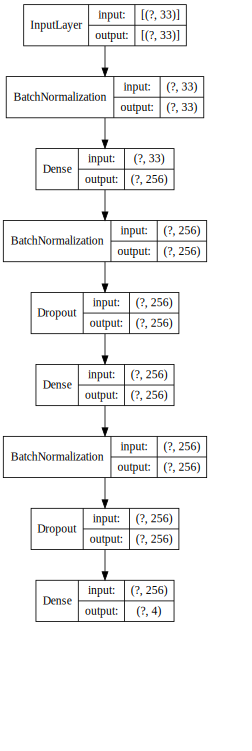

In [5]:
from IPython.display import Image, SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model,
                 show_shapes=True, 
                 show_layer_names=False,
                 rankdir='TB',
                 expand_nested=True,
                 subgraph=False,
                 #show_layer_activations = True,
                 dpi=60).create(prog='dot', format='svg'))

Weight as: {0: 0.66, 1: 0.8, 2: 0.8, 3: 2.5}
Train on 704876 samples, validate on 176220 samples
Epoch 1/15
704876/704876 [==============================] - 30s 43us/sample - loss: 0.9808 - accuracy: 0.5813 - val_loss: 0.7502 - val_accuracy: 0.6514
Epoch 2/15
704876/704876 [==============================] - 27s 39us/sample - loss: 0.7786 - accuracy: 0.6382 - val_loss: 0.7409 - val_accuracy: 0.6521
Epoch 3/15
704876/704876 [==============================] - 26s 37us/sample - loss: 0.7555 - accuracy: 0.6489 - val_loss: 0.7357 - val_accuracy: 0.6626
Epoch 4/15
704876/704876 [==============================] - 26s 37us/sample - loss: 0.7466 - accuracy: 0.6548 - val_loss: 0.7334 - val_accuracy: 0.6590
Epoch 5/15
704876/704876 [==============================] - 27s 38us/sample - loss: 0.7412 - accuracy: 0.6573 - val_loss: 0.7314 - val_accuracy: 0.6660
Epoch 6/15
704876/704876 [==============================] - 26s 37us/sample - loss: 0.7382 - accuracy: 0.6595 - val_loss: 0.7299 - val_accuracy

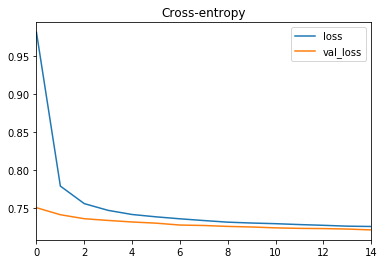

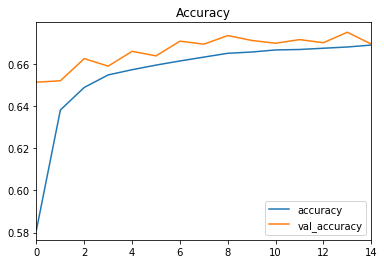

In [9]:
from tensorflow.keras.utils import to_categorical
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape), 
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.2), 
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.2),
    layers.Dense(units=y.shape[1], activation='softmax'),  # one neuron per class, softmax activation for multi-class
])


from tensorflow.keras.optimizers import Adam

lr = 0.0001 # specify learning rate
optimizer = Adam(learning_rate=lr)
#model.compile(optimizer=optimizer, loss='categorical_crossentropy')


model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',  # categorical cross-entropy loss for multi-class
    metrics=['accuracy'],
)

class_weight_attempt = np.array((0.66,0.8,0.8,2.5))
class_weight_attempt_dict = dict(enumerate(class_weight_attempt))
class_weight_attempt_dict
print('Weight as:' , class_weight_attempt_dict)


# Train the model, on the full data set

early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)

#class_weight = {i: class_weights[i] for i in range(len(class_weights))}  # dictionary for multi-class class weights

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=264,
    epochs=15,
    callbacks=[early_stopping],
    #verbose = 0   #Hide output of epochs
    class_weight = class_weight_attempt_dict
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
history_df = pd.DataFrame(history.history)

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 33)                132       
_________________________________________________________________
dense (Dense)                (None, 256)               8704      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

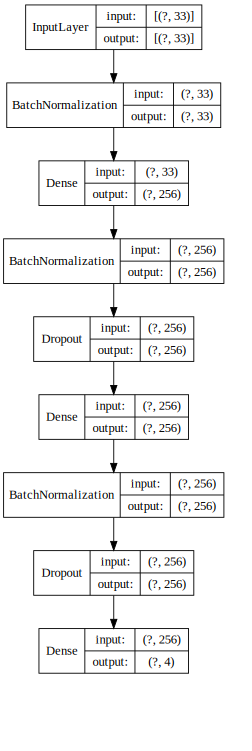

In [11]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, dpi=65).create(prog='dot', format='svg'))


In [49]:
# #using a permutation method to see what features are important


# df column headers
features = ['DiJet_mass', 'HT', 'InputMet_InputJet_mindPhi',
       'InputMet_pt', 'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde',
       'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass',
       'boostedObject_pt', 'boostedTop_area', 'boostedTop_eta',
       'boostedTop_mass', 'boostedTop_pt', 'boostedTop_tag', 'boostedV_area',
       'boostedV_eta', 'boostedV_mass', 'boostedV_pt', 'boostedV_tag',
       'cleanedBJet_eta', 'cleanedBJet_pt', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta',
       'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_pt', 'ncleanedBJet',
       'ncleanedJet']


y_pred = model.predict(X_train)    # can do train or valid, want to see if results differ

# Get the number of features
n_features = X_train.shape[1]

# Initialize an array to store feature importances
importances = np.zeros(n_features)

# Calculate the feature importances using the permutation feature importance method
# Drops each variable one at a time 
for i in range(n_features):
    print(i)    #counter to check is working, should go to 40
    feature_name = features[i]
    X_permuted = X_train
    X_permuted[:, i] = np.random.permutation(X_permuted[:, i])
    y_permuted = model.predict(X_permuted)
    importances[i] = np.abs(y_permuted - y_pred).mean()
    #importances[i] = (y_permuted - y_pred).mean()    #try without a abs, see if positively or negatively affected by removal?
    print(f"Permuted feature {feature_name}")

# Normalize the feature importances
importances /= importances.sum()   # importances sum to 1, so can be taken as a literal how important a variable
# is for the model

print(importances)  # using abs

print()#

print(np.sort(importances))

# np.random.permutation randomly permutes (rearranges in a random order) the elements.
# In this case, it is used to shuffle the values in a single column of the X_permuted array.
# Guess then this variable isnt useful in the prediction

0
Permuted feature DiJet_mass
1
Permuted feature HT
2
Permuted feature InputMet_InputJet_mindPhi
3
Permuted feature InputMet_pt
4
Permuted feature MHT_pt
5
Permuted feature MinChi
6
Permuted feature MinOmegaHat
7
Permuted feature MinOmegaTilde
8
Permuted feature boostedObject_area
9
Permuted feature boostedObject_eta
10
Permuted feature boostedObject_mass
11
Permuted feature boostedObject_pt
12
Permuted feature boostedTop_area
13
Permuted feature boostedTop_eta
14
Permuted feature boostedTop_mass
15
Permuted feature boostedTop_pt
16
Permuted feature boostedTop_tag
17
Permuted feature boostedV_area
18
Permuted feature boostedV_eta
19
Permuted feature boostedV_mass
20
Permuted feature boostedV_pt
21
Permuted feature boostedV_tag
22
Permuted feature cleanedBJet_eta
23
Permuted feature cleanedBJet_pt
24
Permuted feature cleanedJet_area
25
Permuted feature cleanedJet_btagDeepB
26
Permuted feature cleanedJet_chHEF
27
Permuted feature cleanedJet_eta
28
Permuted feature cleanedJet_mass
29
Perm

In [50]:
importances_dict = dict(zip(features, importances))
# key:value

#print(combined_dict)

# get values for keys less than 0.01
values = []
for value, key in importances_dict.items():
    if key < 0.05:
        values.append(value)

# print the values
print(values)

# create a list of feature names and importance scores from the dictionary

import matplotlib.pyplot as plt

# Assuming your dictionary is called `importance_dict`
sorted_dict = dict(sorted(importances_dict.items(), key=lambda item: item[1], reverse=False))

# Extracting feature names and importance scores
feature_names = list(sorted_dict.keys())
importance_scores = list(sorted_dict.values())


['DiJet_mass', 'HT', 'InputMet_InputJet_mindPhi', 'InputMet_pt', 'MHT_pt', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde', 'boostedObject_area', 'boostedObject_eta', 'boostedObject_mass', 'boostedObject_pt', 'boostedTop_area', 'boostedTop_eta', 'boostedTop_mass', 'boostedTop_pt', 'boostedTop_tag', 'boostedV_area', 'boostedV_eta', 'boostedV_mass', 'boostedV_pt', 'boostedV_tag', 'cleanedBJet_eta', 'cleanedBJet_pt', 'cleanedJet_area', 'cleanedJet_btagDeepB', 'cleanedJet_chHEF', 'cleanedJet_eta', 'cleanedJet_mass', 'cleanedJet_neHEF', 'cleanedJet_pt', 'ncleanedBJet', 'ncleanedJet']


In [51]:
# make a mask so only 5 most and leat important features are kept

mask = np.zeros_like(importance_scores, dtype=bool)
mask[:5] = True
mask[-5:] = True

mask

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True])

In [52]:
importance_scores = np.array(importance_scores)
feature_names = np.array(feature_names)

feature_names[2] = 'Met_Jet_mindPhi'

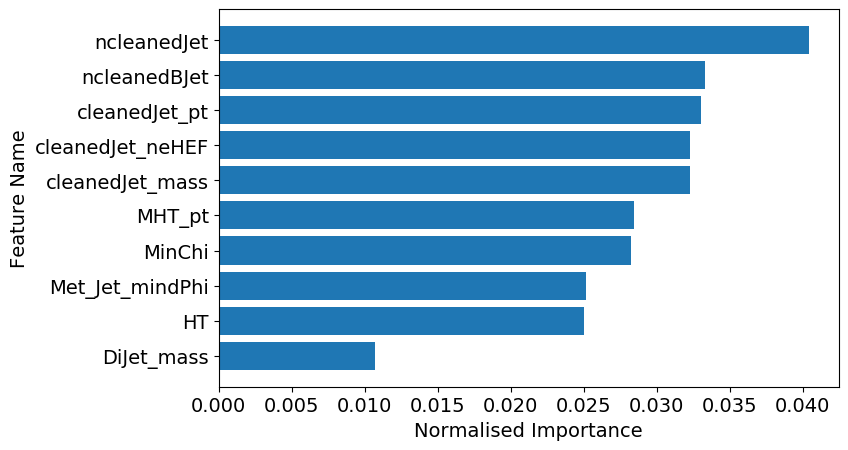

In [53]:
# plot it as a horizontal bar
plt.figure(dpi=100, figsize=(8, 5))
# Plotting horizontal bar chart
plt.barh(feature_names[mask], importance_scores[mask])
plt.xlabel('Normalised Importance', fontsize=14)
plt.ylabel('Feature Name', fontsize=14)

#ax.set_yticks(feature_names, ticks)
plt.tick_params(axis='both', labelsize=14)
plt.savefig('multiclass_permutation.png', dpi=300, bbox_inches='tight')



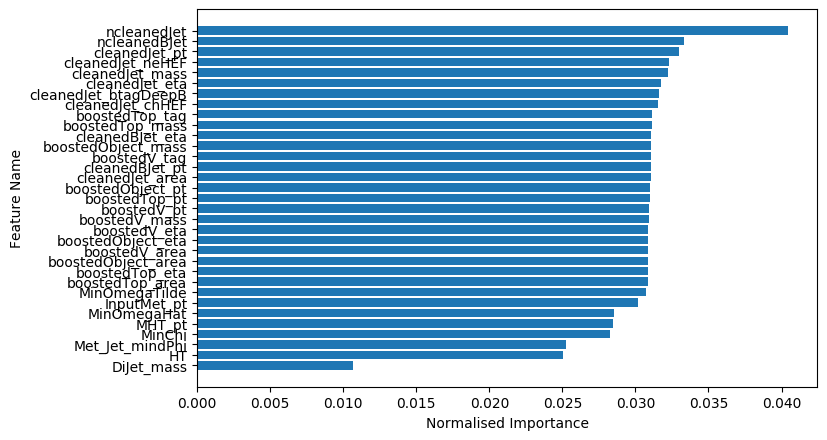

In [60]:
# plot it as a horizontal bar
plt.figure(dpi=100, figsize=(8, 5))
# Plotting horizontal bar chart
plt.barh(feature_names, importance_scores)
plt.xlabel('Normalised Importance')
plt.ylabel('Feature Name')

#ax.set_yticks(feature_names, ticks)
plt.show()

In [9]:
#model.save('trained_multiclass_model_run10.h5')


from tensorflow.keras.models import load_model
model = load_model('trained_multiclass_model_run10.h5')

In [13]:
history_df = pd.DataFrame(history.history)


# # Save the DataFrame to an HDF5 file
with h5py.File('multiclass_run10_training_data.h5', 'w') as hf:
    hf.create_dataset('df', data=history_df)

# with h5py.File('MLP_rnn_run1_training_data.h5', 'r') as hf:
#     history_df = pd.DataFrame(hf['df'][:])

In [10]:
y
# y[0] = sl
# y[1] = hadronic
# y[2] = dileptonic
# y[3] = signal

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [11]:
# Train_weights = X_train['xs_weight']
# Valid_weights = X_valid['xs_weight']
X_train

array([[1.24991784e+02, 4.04562927e+02, 2.72851562e+00, ...,
        2.32821106e+02, 0.00000000e+00, 2.00000000e+00],
       [3.36268807e+02, 4.83575378e+02, 7.58666992e-02, ...,
        2.28842636e+02, 1.00000000e+00, 5.00000000e+00],
       [6.81297158e+02, 1.18546045e+03, 3.01055908e-02, ...,
        6.83951965e+02, 2.00000000e+00, 7.00000000e+00],
       ...,
       [2.04017536e+02, 3.88643372e+02, 2.14257812e+00, ...,
        1.20256294e+02, 0.00000000e+00, 4.00000000e+00],
       [1.31383966e+02, 3.34091614e+02, 2.52148438e+00, ...,
        2.09565598e+02, 1.00000000e+00, 2.00000000e+00],
       [3.13722161e+02, 5.38018982e+02, 5.33691406e-01, ...,
        1.67282990e+02, 1.00000000e+00, 5.00000000e+00]])

True


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation loss: 0.7258155527620282
Validation accuracy: 0.67184585


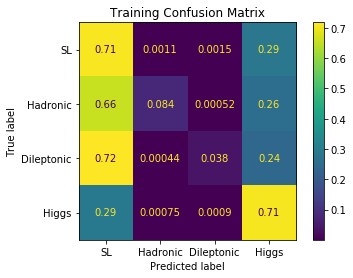

Total signal processes: 142135
Total background processes: 562741
Value 0 occurs 521309 times in the Training data.
Value 0 occurs 441125 times in the models predictions.
So the model predicted 0 80184 less times in the data.

Value 1 occurs 9682 times in the Training data.
Value 1 occurs 1498 times in the models predictions.
So the model predicted 1 8184 less times in the data.

Value 2 occurs 31750 times in the Training data.
Value 2 occurs 2128 times in the models predictions.
So the model predicted 2 29622 less times in the data.

Value 3 occurs 142135 times in the Training data.
Value 3 occurs 260125 times in the models predictions.
So the model predicted 3 -117990 less times in the data.

Total length of training data = 704876


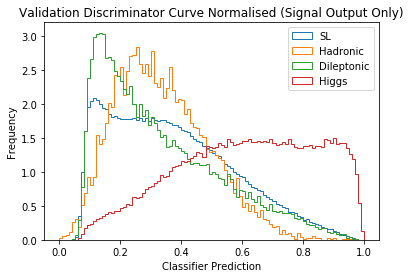

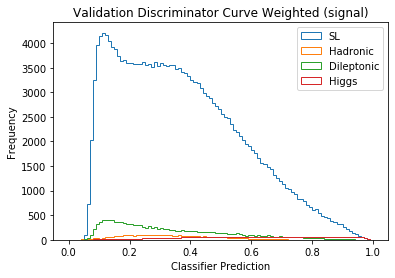

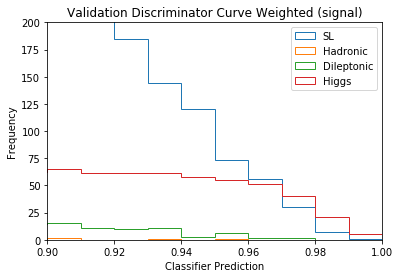

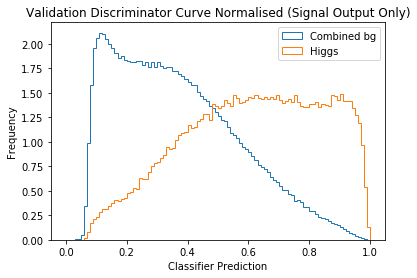

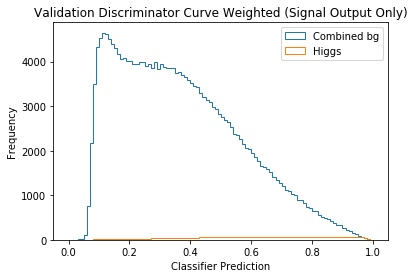

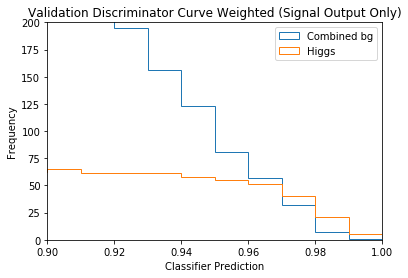

num_sl_events in training =  201321.56069757952
num_hadronic_events in training =  3822.2644709342057
num_dileptonic_events in training =  13475.070965803581
num_signal_events in training =  4399.964587542505
Total number of background events =  218618.8961343173


Training None-average F1 score: [0.77056505 0.1450805  0.07084243 0.50090986]
Training Macro-average F1 score: 0.372
Training Micro-average F1 score: 0.672
Training Weighted-average F1 score: 0.676


In [10]:
# evaluate the model on the training data, confusion matrix and discriminator curve

gpu_available = tf.test.is_gpu_available()
print(gpu_available)

val_loss, val_acc = model.evaluate(X_train, y_train)    

print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

y_pred_train = model.predict(X_train)
y_pred_class = np.argmax(y_pred_train, axis=1)
y_train_class = np.argmax(y_train, axis=1)

# compute the confusion matrix
cm = confusion_matrix(y_train_class, y_pred_class, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SL', 'Hadronic', 'Dileptonic', 'Higgs'])
disp.plot()
plt.title('Training Confusion Matrix')
plt.show()

print('Total signal processes:', np.sum(y_train_class==3))
print('Total background processes:', np.sum(y_train_class!=3))


data_test = {'True_Val': y_train_class, 'Predicted': y_pred_class}
df_test = pd.DataFrame(data_test)

# To find how many of each variable are in the vaidation set, and how many it predicts
# Find the unique values in the array
unique_vals = np.unique(y_train_class)

# Count the number of occurrences of each unique value in the array
for val in unique_vals:
    count = np.count_nonzero(y_train_class == val)
    count_pred = np.count_nonzero(y_pred_class == val)
    print(f"Value {val} occurs {count} times in the Training data.")
    print(f"Value {val} occurs {count_pred} times in the models predictions.")
    print(f"So the model predicted {val} {count - count_pred} less times in the data.")
    
    print()
    
print('Total length of training data =', len(y_train_class))


#Try to make Discriminator curve for multiclass classifier

mask0 = y_train[:,0] == 1
mask1 = y_train[:,1] == 1
mask2 = y_train[:,2] == 1
mask3 = y_train[:,3] == 1


# plot normalised histogram
binwidth = 0.01
bins=np.arange(0, 1 + binwidth, binwidth)
plt.hist(x= y_pred_train[:,3][mask0], bins=bins,  density = True, histtype = 'step', label = 'SL')
plt.hist(x= y_pred_train[:,3][mask1], bins=bins,  density = True, histtype = 'step', label = 'Hadronic')
plt.hist(x= y_pred_train[:,3][mask2], bins=bins,  density = True, histtype = 'step', label = 'Dileptonic')
plt.hist(x= y_pred_train[:,3][mask3], bins=bins,  density = True, histtype = 'step', label = 'Higgs')
    
plt.title('Validation Discriminator Curve Normalised (Signal Output Only)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()

# CALCULATE NUMBER OF SIGNAL AND BG EVENTS FROM HISTOGRAMS
# DOESNT MATTER WHICH ONE I USE, AS SUMMING UP ALL BINS

# Produce weighted Histograms

n_sl, bins_sl, patches_sl = plt.hist(x= y_pred_train[:,3][mask0], bins=bins, 
                                     weights = Train_weights[mask0]*3e5*1/0.8 , histtype = 'step', label = 'SL')
n_hadronic, bins_hadronic, patches_hadronic = plt.hist(x= y_pred_train[:,3][mask1], bins=bins, 
                                     weights = Train_weights[mask1]*3e5*1/0.8 , histtype = 'step', label = 'Hadronic')
n_dileptonic, bins_dileptonic, patches_dileptonic = plt.hist(x= y_pred_train[:,3][mask2], bins=bins,
                                     weights = Train_weights[mask2]*3e5*1/0.8 , histtype = 'step', label = 'Dileptonic')
n_higgs, bins_higgs, patches_higgs = plt.hist(x= y_pred_train[:,3][mask3], bins=bins,
                                     weights = Train_weights[mask3]*3e5*1/0.8 , histtype = 'step', label = 'Higgs')
# can get rid of the '1-'' part to show a move to the right means identified correctly.
    
plt.title('Validation Discriminator Curve Weighted (signal)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()


# Produce weighted Histograms

n_sl, bins_sl, patches_sl = plt.hist(x= y_pred_train[:,3][mask0], bins=bins, 
                                     weights = Train_weights[mask0]*3e5*1/0.8 , histtype = 'step', label = 'SL')
n_hadronic, bins_hadronic, patches_hadronic = plt.hist(x= y_pred_train[:,3][mask1], bins=bins, 
                                     weights = Train_weights[mask1]*3e5*1/0.8 , histtype = 'step', label = 'Hadronic')
n_dileptonic, bins_dileptonic, patches_dileptonic = plt.hist(x= y_pred_train[:,3][mask2], bins=bins,
                                     weights = Train_weights[mask2]*3e5*1/0.8 , histtype = 'step', label = 'Dileptonic')
n_higgs, bins_higgs, patches_higgs = plt.hist(x= y_pred_train[:,3][mask3], bins=bins,
                                     weights = Train_weights[mask3]*3e5*1/0.8 , histtype = 'step', label = 'Higgs')
# can get rid of the '1-'' part to show a move to the right means identified correctly.
    
plt.title('Validation Discriminator Curve Weighted (signal)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()


# plot normalised histogram
binwidth = 0.01
bins=np.arange(0, 1 + binwidth, binwidth)

all_bg_train = np.concatenate((y_pred_train[:,3][mask0] , y_pred_train[:,3][mask1], y_pred_train[:,3][mask2]), axis=0)
all_bg_train_weights = np.concatenate((Train_weights[mask0], Train_weights[mask1] ,Train_weights[mask2]), axis=0)  

plt.hist(x= all_bg_train, bins=bins,  density = True, histtype = 'step', label = 'Combined bg')
plt.hist(x= y_pred_train[:,3][mask3], bins=bins,  density = True, histtype = 'step', label = 'Higgs')
    
plt.title('Validation Discriminator Curve Normalised (Signal Output Only)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()

# plot correctly weighted
plt.hist(x= all_bg_train, bins=bins,  weights = all_bg_train_weights*3e5*1/0.8, histtype = 'step', label = 'Combined bg')
plt.hist(x= y_pred_train[:,3][mask3], bins=bins,  weights = Train_weights[mask3]*3e5*1/0.8, histtype = 'step', label = 'Higgs')
    
plt.title('Validation Discriminator Curve Weighted (Signal Output Only)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()

# plot correctly weighted
n_bg, bins_bg, patches_bg = plt.hist(x= all_bg_train, bins=bins,  weights = all_bg_train_weights*3e5*1/0.8, 
                                     histtype = 'step', label = 'Combined bg')
n_higgs, bins_higgs, patches_higgs = plt.hist(x= y_pred_train[:,3][mask3], bins=bins,  
                                              weights = Train_weights[mask3]*3e5*1/0.8, histtype = 'step', label = 'Higgs')
    
plt.title('Validation Discriminator Curve Weighted (Signal Output Only)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()


#Calculate number of events

num_sl_events_train = np.sum(n_sl)
num_hadronic_events_train = np.sum(n_hadronic)
num_dileptonic_events_train = np.sum(n_dileptonic)
num_signal_events_train = np.sum(n_higgs)

print('num_sl_events in training = ', num_sl_events_train)
print('num_hadronic_events in training = ', num_hadronic_events_train)
print('num_dileptonic_events in training = ', num_dileptonic_events_train)
print('num_signal_events in training = ', num_signal_events_train)

print('Total number of background events = ', num_sl_events_train+num_hadronic_events_train+num_dileptonic_events_train)

print()
print()

# F1 train score
from sklearn.metrics import f1_score

f1 = f1_score(y_train_class, y_pred_class, average= None)
print("Training None-average F1 score: {}".format(f1))

f1 = f1_score(y_train_class, y_pred_class, average='macro')
print("Training Macro-average F1 score: {:.3f}".format(f1))


f1 = f1_score(y_train_class, y_pred_class, average='micro')
print("Training Micro-average F1 score: {:.3f}".format(f1))


f1 = f1_score(y_train_class, y_pred_class, average='weighted')
print("Training Weighted-average F1 score: {:.3f}".format(f1))



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation loss: 0.729461482576176
Validation accuracy: 0.669487


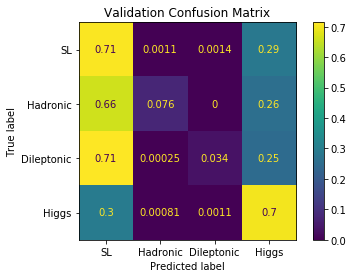

Total signal processes: 35723
Total background processes: 140497


In [11]:
# evaluate the model on the validation data

val_loss, val_acc = model.evaluate(X_valid, y_valid)   
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)


y_pred = model.predict(X_valid)
y_pred_class = np.argmax(y_pred, axis=1)
y_valid_class = np.argmax(y_valid, axis=1)

# compute the confusion matrix
cm = confusion_matrix(y_valid_class, y_pred_class, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SL', 'Hadronic', 'Dileptonic', 'Higgs'])
disp.plot()
plt.title('Validation Confusion Matrix')
plt.show()

print('Total signal processes:', np.sum(y_valid_class==3))
print('Total background processes:', np.sum(y_valid_class!=3))

In [12]:
# print(y_pred)
# sum(y_pred[0,:])
y_pred_class = np.argmax(y_pred, axis=1)
print(y_valid_class)
y_valid

print('Hadronic Has: 12185 events in the dataframe')
print('SL has: 651387 events in the dataframe')
print('Dileptonic Has: 39666 events in the dataframe')
print('Higgs has: 177858 events in the dataframe')



[0 0 3 ... 0 0 0]
Hadronic Has: 12185 events in the dataframe
SL has: 651387 events in the dataframe
Dileptonic Has: 39666 events in the dataframe
Higgs has: 177858 events in the dataframe


In [13]:
# To find how many of each variable are in the vaidation set, and how many it predicts

y_valid_class

# Find the unique values in the array
unique_vals = np.unique(y_valid_class)

# Count the number of occurrences of each unique value in the array
for val in unique_vals:
    count = np.count_nonzero(y_valid_class == val)
    count_pred = np.count_nonzero(y_pred_class == val)
    print(f"Value {val} occurs {count} times in the validation data.")
    print(f"Value {val} occurs {count_pred} times in the models predictions.")
    print(f"So the model predicted {val} {count - count_pred} less times in the data.")
    
    print()
    
print('Total length of validation data =', len(y_valid_class))

Value 0 occurs 130078 times in the validation data.
Value 0 occurs 110410 times in the models predictions.
So the model predicted 0 19668 less times in the data.

Value 1 occurs 2503 times in the validation data.
Value 1 occurs 359 times in the models predictions.
So the model predicted 1 2144 less times in the data.

Value 2 occurs 7916 times in the validation data.
Value 2 occurs 494 times in the models predictions.
So the model predicted 2 7422 less times in the data.

Value 3 occurs 35723 times in the validation data.
Value 3 occurs 64957 times in the models predictions.
So the model predicted 3 -29234 less times in the data.

Total length of validation data = 176220


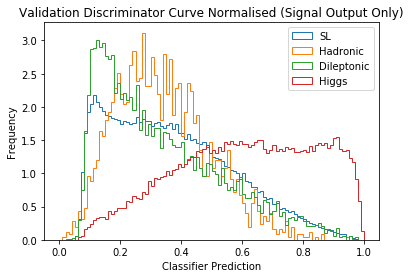

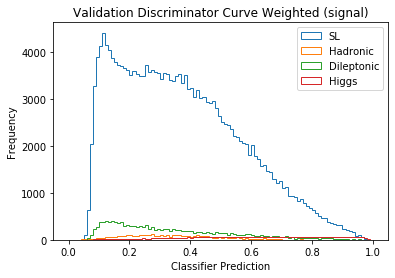

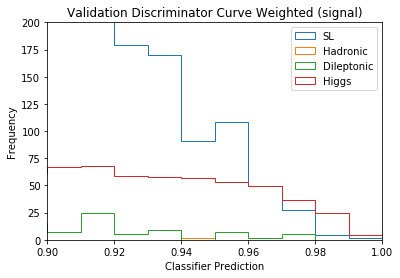

num_sl_events in validation =  201204.41477576332
num_hadronic_events in validation =  3914.116152934815
num_dileptonic_events in validation =  13435.298348667857
num_signal_events in validation =  4428.497882934465
Total number of background events =  218553.829277366


In [14]:
# New Disc curve Idea
# This way shows for all events, what was the signal prediction

mask0 = y_valid[:,0] == 1    # SL
mask1 = y_valid[:,1] == 1    # Hadronic
mask2 = y_valid[:,2] == 1    # Dileptonic
mask3 = y_valid[:,3] == 1    # Signal

# plot normalised histogram
binwidth = 0.01
bins=np.arange(0, 1 + binwidth, binwidth)
plt.hist(x= y_pred[:,3][mask0], bins=bins,  density = True, histtype = 'step', label = 'SL')
plt.hist(x= y_pred[:,3][mask1], bins=bins,  density = True, histtype = 'step', label = 'Hadronic')
plt.hist(x= y_pred[:,3][mask2], bins=bins,  density = True, histtype = 'step', label = 'Dileptonic')
plt.hist(x= y_pred[:,3][mask3], bins=bins,  density = True, histtype = 'step', label = 'Higgs')
    
plt.title('Validation Discriminator Curve Normalised (Signal Output Only)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()

# CALCULATE NUMBER OF SIGNAL AND BG EVENTS FROM HISTOGRAMS
# DOESNT MATTER WHICH ONE I USE, AS SUMMING UP ALL BINS

# Produce weighted Histograms

n_sl, bins_sl, patches_sl = plt.hist(x= y_pred[:,3][mask0], bins=bins, 
                                     weights = Valid_weights[mask0]*3e5*1/0.2 , histtype = 'step', label = 'SL')
n_hadronic, bins_hadronic, patches_hadronic = plt.hist(x= y_pred[:,3][mask1], bins=bins, 
                                     weights = Valid_weights[mask1]*3e5*1/0.2 , histtype = 'step', label = 'Hadronic')
n_dileptonic, bins_dileptonic, patches_dileptonic = plt.hist(x= y_pred[:,3][mask2], bins=bins,
                                     weights = Valid_weights[mask2]*3e5*1/0.2 , histtype = 'step', label = 'Dileptonic')
n_higgs, bins_higgs, patches_higgs = plt.hist(x= y_pred[:,3][mask3], bins=bins,
                                     weights = Valid_weights[mask3]*3e5*1/0.2 , histtype = 'step', label = 'Higgs')
# can get rid of the '1-'' part to show a move to the right means identified correctly.
    
plt.title('Validation Discriminator Curve Weighted (signal)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()


# Produce weighted Histograms

n_sl, bins_sl, patches_sl = plt.hist(x= y_pred[:,3][mask0], bins=bins, 
                                     weights = Valid_weights[mask0]*3e5*1/0.2 , histtype = 'step', label = 'SL')
n_hadronic, bins_hadronic, patches_hadronic = plt.hist(x= y_pred[:,3][mask1], bins=bins, 
                                     weights = Valid_weights[mask1]*3e5*1/0.2 , histtype = 'step', label = 'Hadronic')
n_dileptonic, bins_dileptonic, patches_dileptonic = plt.hist(x= y_pred[:,3][mask2], bins=bins,
                                     weights = Valid_weights[mask2]*3e5*1/0.2 , histtype = 'step', label = 'Dileptonic')
n_higgs, bins_higgs, patches_higgs = plt.hist(x= y_pred[:,3][mask3], bins=bins,
                                     weights = Valid_weights[mask3]*3e5*1/0.2 , histtype = 'step', label = 'Higgs')
# can get rid of the '1-'' part to show a move to the right means identified correctly.
    
plt.title('Validation Discriminator Curve Weighted (signal)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()

#Calculate number of events

num_sl_events = np.sum(n_sl)
num_hadronic_events = np.sum(n_hadronic)
num_dileptonic_events = np.sum(n_dileptonic)
num_signal_events = np.sum(n_higgs)

print('num_sl_events in validation = ', num_sl_events)
print('num_hadronic_events in validation = ', num_hadronic_events)
print('num_dileptonic_events in validation = ', num_dileptonic_events)
print('num_signal_events in validation = ', num_signal_events)

print('Total number of background events = ', num_sl_events+num_hadronic_events+num_dileptonic_events)

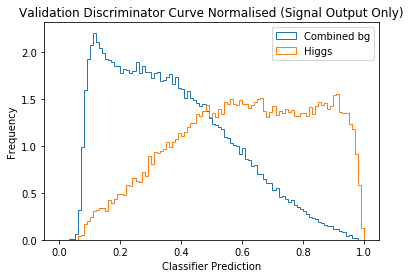

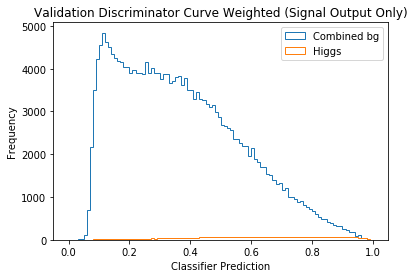

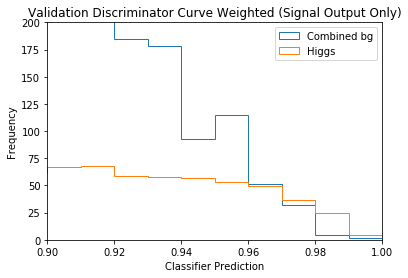

In [15]:
# New Disc curve Idea
# This way shows for all events, what was the signal prediction
# Want to combine the 3 bg discriminator curves into 1 overll bg curve

mask0 = y_valid[:,0] == 1    # SL
mask1 = y_valid[:,1] == 1    # Hadronic
mask2 = y_valid[:,2] == 1    # Dileptonic
mask3 = y_valid[:,3] == 1    # Signal

# plot normalised histogram
binwidth = 0.01
bins=np.arange(0, 1 + binwidth, binwidth)

all_bg = np.concatenate((y_pred[:,3][mask0] , y_pred[:,3][mask1], y_pred[:,3][mask2]), axis=0)
all_bg_weights = np.concatenate((Valid_weights[mask0], Valid_weights[mask1] ,Valid_weights[mask2]), axis=0)  

plt.hist(x= all_bg, bins=bins,  density = True, histtype = 'step', label = 'Combined bg')
plt.hist(x= y_pred[:,3][mask3], bins=bins,  density = True, histtype = 'step', label = 'Higgs')
    
plt.title('Validation Discriminator Curve Normalised (Signal Output Only)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()

# plot correctly weighted
plt.hist(x= all_bg, bins=bins,  weights = all_bg_weights*3e5*1/0.2, histtype = 'step', label = 'Combined bg')
plt.hist(x= y_pred[:,3][mask3], bins=bins,  weights = Valid_weights[mask3]*3e5*1/0.2, histtype = 'step', label = 'Higgs')
    
plt.title('Validation Discriminator Curve Weighted (Signal Output Only)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()

# plot correctly weighted
n_bg, bins_bg, patches_bg = plt.hist(x= all_bg, bins=bins,  weights = all_bg_weights*3e5*1/0.2, 
                                     histtype = 'step', label = 'Combined bg')
n_signal, bins_signal, patches_signal = plt.hist(x= y_pred[:,3][mask3], bins=bins,  
                                              weights = Valid_weights[mask3]*3e5*1/0.2, histtype = 'step', label = 'Higgs')
    
plt.title('Validation Discriminator Curve Weighted (Signal Output Only)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Frequency')
plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right')
plt.show()

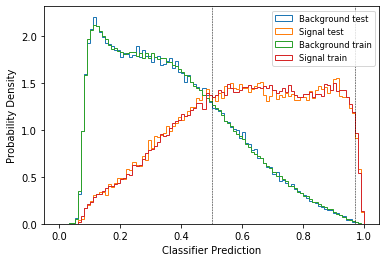

In [16]:
# plot normalised histogram
binwidth = 0.01
bins=np.arange(0, 1 + binwidth, binwidth)

all_bg = np.concatenate((y_pred[:,3][mask0] , y_pred[:,3][mask1], y_pred[:,3][mask2]), axis=0)
all_bg_weights = np.concatenate((Valid_weights[mask0], Valid_weights[mask1] ,Valid_weights[mask2]), axis=0)  

plt.hist(x= all_bg, bins=bins,  density = True, histtype = 'step', label = 'Background test')
plt.hist(x= y_pred[:,3][mask3], bins=bins,  density = True, histtype = 'step', label = 'Signal test')
    
mask3_train = y_train[:,3] == 1    # Signal
plt.hist(x= all_bg_train, bins=bins,  density = True, histtype = 'step', label = 'Background train')
plt.hist(x= y_pred_train[:,3][mask3_train], bins=bins,  density = True, histtype = 'step', label = 'Signal train')

plt.axvline(x=0.97, color='black', linestyle='--', linewidth=0.5)

plt.axvline(x=0.5, color='black', linestyle='--', linewidth=0.5)
    
#plt.title('Validation Discriminator Curve Normalised (Signal Output Only)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Probability Density')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right', fontsize = 'small')
plt.show()

In [17]:
data = {'True_Val': y_valid_class, 'Predicted': y_pred_class}
df = pd.DataFrame(data)

# Easiest to reorder df, so all 0 (background) are first and then 1's (signal)

#Verified, works
df = df.sort_values(by='True_Val')
#df

# Convert arrays to scalars
#df['Round Prediction'] = df['Round Prediction'].apply(lambda x: x[0])

df

,True_Val,Predicted
0,0,0
108586,0,0
108587,0,0
108588,0,3
108589,0,0
...,...,...
18716,3,3
64665,3,3
18714,3,3
35605,3,3


In [24]:
#y_valid

In [19]:
roc_data =  {'True_Val': y_valid_class,  'Predicted_Class': y_pred_class}
roc_data_df = pd.DataFrame(roc_data)
roc_data_df2 = pd.DataFrame(y_pred)
roc_data_df3 = pd.DataFrame(y_valid)

# Save the DataFrame to an HDF5 file
with h5py.File('multiclass_run10_ROC_data.h5', 'w') as hf:
    hf.create_dataset('df1', data=roc_data_df)
    hf.create_dataset('df2', data=roc_data_df2)
    hf.create_dataset('df3', data=roc_data_df3)

In [20]:
#f1 score
from sklearn.metrics import f1_score

f1 = f1_score(y_valid_class, y_pred_class, average= None)
print("Validation None-average F1 score: {}".format(f1))

f1 = f1_score(y_valid_class, y_pred_class, average='macro')
print("Validation Macro-average F1 score: {:.3f}".format(f1))


f1 = f1_score(y_valid_class, y_pred_class, average='micro')
print("Validation Micro-average F1 score: {:.3f}".format(f1))


f1 = f1_score(y_valid_class, y_pred_class, average='weighted')
print("Validation Weighted-average F1 score: {:.3f}".format(f1))


Validation None-average F1 score: [0.76908619 0.13207547 0.06492271 0.49735797]
Validation Macro-average F1 score: 0.366
Validation Micro-average F1 score: 0.669
Validation Weighted-average F1 score: 0.673


# Significance

$$ Z = \frac{s}{\sqrt(B+\sigma_s^{2})}  $$

s = number of signal

B = number of background

$\sigma_s$ = statistical uncertainty (~5% of B)

In [63]:
# Explained ideas in this case in notes and on one note
num_bg_events = np.sum(n_sl+n_hadronic+n_dileptonic)
num_signal_events = np.sum(n_higgs)

num_bg_events
num_signal_events

4428.497882934465

218553.82927736928
4428.497882934465


/software/deep-learning/envs/ml-microscope/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


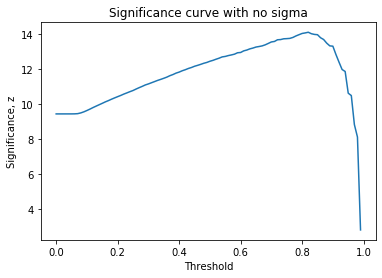

0.8200000000000001
82
14.108958443681912

If cut at a threshold of 0.82 have
977.3713480267061 singal events
4483.740957650065 background events


/software/deep-learning/envs/ml-microscope/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


In [64]:
num_bg_events = np.sum(n_bg)
num_signal_events = np.sum(n_signal)

print(num_bg_events)
print(num_signal_events)

z_0 = np.empty(len(bins_bg))
for i in range(len(bins_bg)):
    b = np.sum(n_bg[i:])
    s = np.sum(n_signal[i:])
    z_i = np.sqrt(2*((s+b)*np.log(1+(s/b))-s))  
    z_0[i] = z_i

x = np.linspace(0,1,len(z_0))
plt.plot(bins_bg,z_0[:])
plt.xlabel('Threshold')
plt.ylabel('Significance, z')
plt.title('Significance curve with no sigma')
plt.show()


mask_0 = z_0 < 1e10     #just so doesnt include infs
index_of_max_0 = np.argmax(z_0[mask_0])
max_value_0 = np.amax(z_0[mask_0])


#index_of_max = np.nanargmax(z[:])
#max_value = np.nanmax(z[:])     # 1 point before last, should probs generalise so that can deal w inf etc 
max_bin_0 = bins_bg[index_of_max_0]
print(max_bin_0)
print(index_of_max_0)
print(max_value_0)

# significance = sigmna, 6.5 signma, 5 sigma

num_bg_threshold_0 = np.sum(n_bg[index_of_max_0:])
num_signal_threshold_0 = np.sum(n_signal[index_of_max_0:])

print()
print('If cut at a threshold of', index_of_max_0/100, 'have')
print(num_signal_threshold_0, 'singal events')
print(num_bg_threshold_0, 'background events')

218553.82927736928
4428.497882934465


/software/deep-learning/envs/ml-microscope/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/software/deep-learning/envs/ml-microscope/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


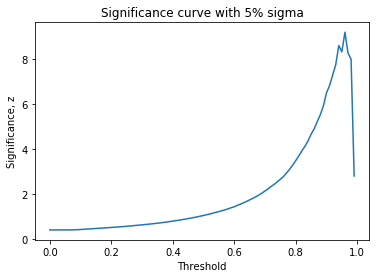

0.96
96
9.186885096095963

If cut at a threshold of 0.96 have
116.22018832133926 singal events
89.45073273059097 background events


/software/deep-learning/envs/ml-microscope/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less


In [66]:
num_bg_events = np.sum(n_bg)
num_signal_events = np.sum(n_signal)

print(num_bg_events)
print(num_signal_events)

z_5 = np.empty(len(bins_bg))
for i in range(len(bins_bg)):
    b = np.sum(n_bg[i:])
    s = np.sum(n_signal[i:])

    sigma = 0.05*b  
    part1 = (s+b)*np.log(((s+b)*(b+sigma**2))/(b**2+((s+b)*sigma**2)))
    part2 = (b**2/sigma**2)*np.log(1+((sigma**2*s)/(b*(b+sigma**2))))
    
    z_5[i] = (2*(part1-part2))**(1/2)

x = np.linspace(0,1,len(z_5))
plt.plot(bins_bg,z_5[:])
plt.xlabel('Threshold')
plt.ylabel('Significance, z')
plt.title('Significance curve with 5% sigma')
plt.show()


mask_5 = z_5 < 1e10     #just so doesnt include infs
index_of_max_5 = np.argmax(z_5[mask_5])
max_value_5 = np.amax(z_5[mask_5])


#index_of_max = np.nanargmax(z[:])
#max_value = np.nanmax(z[:])     # 1 point before last, should probs generalise so that can deal w inf etc 
max_bin_5 = bins_bg[index_of_max_5]
print(max_bin_5)
print(index_of_max_5)
print(max_value_5)

# significance = sigmna, 6.5 signma, 5 sigma

num_bg_threshold_5 = np.sum(n_bg[index_of_max_5:])
num_signal_threshold_5 = np.sum(n_signal[index_of_max_5:])

print()
print('If cut at a threshold of', index_of_max_5/100, 'have')
print(num_signal_threshold_5, 'singal events')
print(num_bg_threshold_5, 'background events')

218553.82927736928
4428.497882934465


/software/deep-learning/envs/ml-microscope/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/software/deep-learning/envs/ml-microscope/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


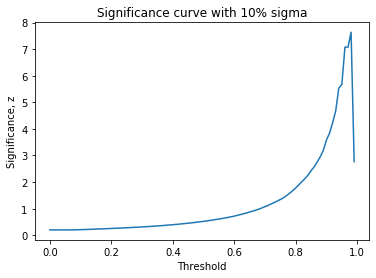

0.98
98
7.634492904938925

If cut at a threshold of 0.98 have
29.739846169770317 singal events
6.352889158762991 background events


/software/deep-learning/envs/ml-microscope/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less


In [67]:
print(num_bg_events)
print(num_signal_events)

z_10 = np.empty(len(bins_bg))
for i in range(len(bins_bg)):
    b = np.sum(n_bg[i:])
    s = np.sum(n_signal[i:])

    sigma = 0.1*b  
    part1 = (s+b)*np.log(((s+b)*(b+sigma**2))/(b**2+((s+b)*sigma**2)))
    part2 = (b**2/sigma**2)*np.log(1+((sigma**2*s)/(b*(b+sigma**2))))
    
    z_10[i] = (2*(part1-part2))**(1/2)

x = np.linspace(0,1,len(z_10))
plt.plot(bins_bg,z_10[:])
plt.xlabel('Threshold')
plt.ylabel('Significance, z')
plt.title('Significance curve with 10% sigma')
plt.show()


mask_10 = z_10 < 1e10     #just so doesnt include infs
index_of_max_10 = np.argmax(z_10[mask_10])
max_value_10 = np.amax(z_10[mask_10])


#index_of_max = np.nanargmax(z[:])
#max_value = np.nanmax(z[:])     # 1 point before last, should probs generalise so that can deal w inf etc 
max_bin_10 = bins_bg[index_of_max_10]
print(max_bin_10)
print(index_of_max_10)
print(max_value_10)

# significance = sigmna, 6.5 signma, 5 sigma

num_bg_threshold_10 = np.sum(n_bg[index_of_max_10:])
num_signal_threshold_10 = np.sum(n_signal[index_of_max_10:])

print()
print('If cut at a threshold of', index_of_max_10/100, 'have')
print(num_signal_threshold_10, 'singal events')
print(num_bg_threshold_10, 'background events')

In [26]:
raw_sig_curve_data = {'syst_uncertainty (0%)': z_0, 
                      'syst_uncertainty (5%)': z_5, 
                      'syst_uncertainty (10%)': z_10, 
                     }
raw_sig_df = pd.DataFrame(raw_sig_curve_data)


# Save the DataFrame to an HDF5 file
with h5py.File('multiclass_raw_sig_data_run10.h5', 'w') as hf:
    hf.create_dataset('df', data=raw_sig_df)

In [25]:
raw_sig_df

NameError: name 'raw_sig_df' is not defined

In [33]:
significances = np.array((max_value_0, max_value_5, max_value_10))
syst_uncertainty = np.array((0, 0.05, 0.1))
discriminators = np.array((index_of_max_0/100, index_of_max_5/100, index_of_max_10/100))
num_bg_threshold = np.array((num_bg_threshold_0, num_bg_threshold_5, num_bg_threshold_10))
num_signal_threshold = np.array((num_signal_threshold_0,num_signal_threshold_5,num_signal_threshold_10))

sig_curve_data = {'syst_uncertainty (%)': syst_uncertainty, 'Significances': significances, 'Threshold': discriminators, 'no_bg': num_bg_threshold, 'no_signal':num_signal_threshold}
sig_df = pd.DataFrame(sig_curve_data)


# Save the DataFrame to an HDF5 file
with h5py.File('multiclass_sig_data_run10.h5', 'w') as hf:
    hf.create_dataset('df', data=sig_df)
    
# with h5py.File('run1_ROC_data.h5', 'r') as hf:
#     df = pd.DataFrame(hf['df'][:])

# can make confusion matricies with things I have saved

In [34]:
sig_df

,syst_uncertainty (%),Significances,Threshold,no_bg,no_signal
0,0.00,14.108958,0.82,4483.740958,977.371348
1,0.05,9.186885,0.96,89.450733,116.220188
2,0.10,7.634493,0.98,6.352889,29.739846


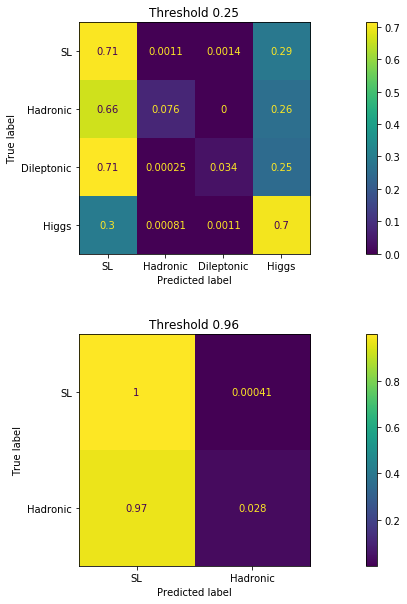

In [68]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

# plot the first confusion matrix
cm = confusion_matrix(y_valid_class, y_pred_class, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SL', 'Hadronic', 'Dileptonic', 'Higgs'])
disp.plot(ax=axs[0])
axs[0].set_title('Threshold 0.25')


# plot the second confusion matrix

# Create a new 1D array to store the binary classification
classification_pred = np.zeros((len(y_pred[:, 3]),), dtype=int)

# Set values to 1 where the 4th column prediction is above 0.97
classification_pred[y_pred[:, 3] > (index_of_max_5/100)] = 1

classification_pred

classication_valid = np.zeros((len(y_valid[:, 3]),), dtype=int)

y_valid_class
# Replace 0, 1, and 2 with 0, and 3 with 1
y_valid_class_sg_or_bg = np.where(y_valid_class <= 2, 0, 1)

y_valid_class_sg_or_bg

# compute the confusion matrix
cm = confusion_matrix(y_valid_class_sg_or_bg, classification_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SL', 'Hadronic', 'Dileptonic', 'Higgs'])
disp.plot(ax=axs[1])
axs[1].set_title(f'Threshold {index_of_max_5/100}')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.35)

#plt.show()

3

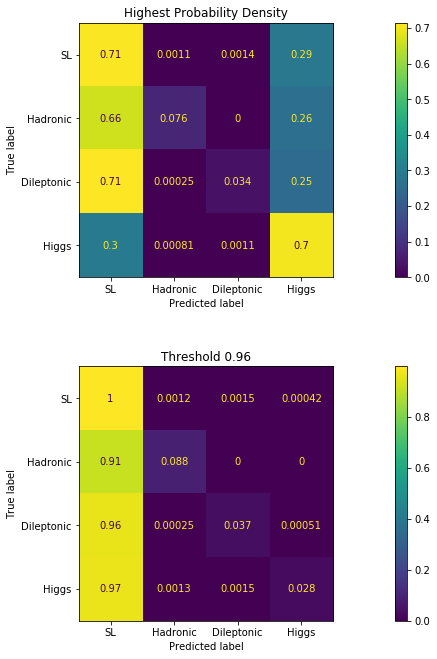

In [76]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(22,11))

# plot the first confusion matrix
cm = confusion_matrix(y_valid_class, y_pred_class, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SL', 'Hadronic', 'Dileptonic', 'Higgs'])
disp.plot(ax=axs[0])
axs[0].set_title('Highest Probability Density')


# plot the second confusion matrix

# You can get the predicted class for each example using argmax
y_pred_class = np.argmax(y_pred, axis=1)

# Create a new 1D array to store the final predictions
final_pred = np.zeros(y_pred_class.shape)

# Check which examples have a prediction above the threshold for class 4
threshold = index_of_max_5/100

class4_mask = (y_pred[:,3] > threshold)

# For examples with class 4 prediction above threshold, set the final prediction to 1
final_pred[class4_mask] = 3

# For examples with class 4 prediction below threshold, set the final prediction to the next highest class
next_highest = np.argmax(y_pred[:, :3], axis=1)
final_pred[~class4_mask] = next_highest[~class4_mask]

# compute the confusion matrix
cm = confusion_matrix(y_valid_class, final_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SL', 'Hadronic', 'Dileptonic', 'Higgs'])
disp.plot(ax=axs[1])
axs[1].set_title(f'Threshold {index_of_max_5/100}')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.35)

#plt.savefig('multiclass_cm.png', dpi=300, bbox_inches='tight')



In [37]:
# # You can get the predicted class for each example using argmax
# y_pred_class = np.argmax(y_pred, axis=1)

# # Create a new 1D array to store the final predictions
# final_pred = np.zeros(y_pred_class.shape)

# # Check which examples have a prediction above the threshold for class 4
# threshold = index_of_max_5/100

# class4_mask = (y_pred[:,3] > threshold)

# # For examples with class 4 prediction above threshold, set the final prediction to 1
# final_pred[class4_mask] = 3

# # For examples with class 4 prediction below threshold, set the final prediction to the next highest class
# next_highest = np.argmax(y_pred[:, :3], axis=1)
# final_pred[~class4_mask] = next_highest[~class4_mask]

# # compute the confusion matrix
# cm = confusion_matrix(y_valid_class, final_pred, normalize='true')
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SL', 'Hadronic', 'Dileptonic', 'Higgs'])
# disp.plot()
# plt.title('Validation Confusion Matrix')
# plt.show()

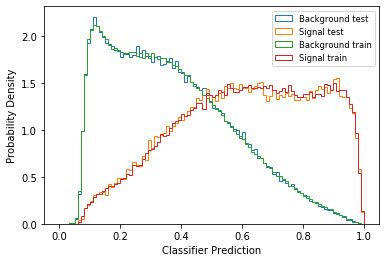

In [20]:
# plot normalised histogram
binwidth = 0.01
bins=np.arange(0, 1 + binwidth, binwidth)

all_bg = np.concatenate((y_pred[:,3][mask0] , y_pred[:,3][mask1], y_pred[:,3][mask2]), axis=0)
all_bg_weights = np.concatenate((Valid_weights[mask0], Valid_weights[mask1] ,Valid_weights[mask2]), axis=0)  

plt.hist(x= all_bg, bins=bins,  density = True, histtype = 'step', label = 'Background test')
plt.hist(x= y_pred[:,3][mask3], bins=bins,  density = True, histtype = 'step', label = 'Signal test')
    
mask3_train = y_train[:,3] == 1    # Signal
plt.hist(x= all_bg_train, bins=bins,  density = True, histtype = 'step', label = 'Background train')
plt.hist(x= y_pred_train[:,3][mask3_train], bins=bins,  density = True, histtype = 'step', label = 'Signal train')


#plt.title('Validation Discriminator Curve Normalised (Signal Output Only)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Probability Density')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,200)    # need to zoom in
plt.legend(loc = 'upper right', fontsize = 'small')
#plt.show()
plt.savefig('multiclass_disc_curve.png', dpi=300, bbox_inches='tight')

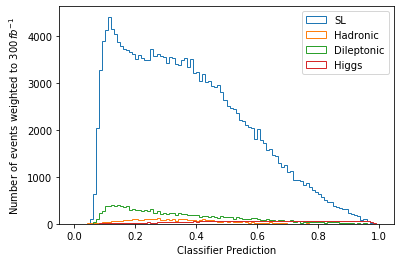

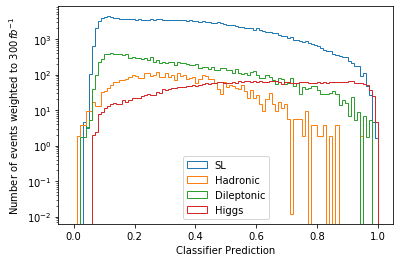

In [19]:
# Produce weighted Histograms

n_sl, bins_sl, patches_sl = plt.hist(x= y_pred[:,3][mask0], bins=bins, 
                                     weights = Valid_weights[mask0]*3e5*1/0.2 , histtype = 'step', label = 'SL')
n_hadronic, bins_hadronic, patches_hadronic = plt.hist(x= y_pred[:,3][mask1], bins=bins, 
                                     weights = Valid_weights[mask1]*3e5*1/0.2 , histtype = 'step', label = 'Hadronic')
n_dileptonic, bins_dileptonic, patches_dileptonic = plt.hist(x= y_pred[:,3][mask2], bins=bins,
                                     weights = Valid_weights[mask2]*3e5*1/0.2 , histtype = 'step', label = 'Dileptonic')
n_higgs, bins_higgs, patches_higgs = plt.hist(x= y_pred[:,3][mask3], bins=bins,
                                     weights = Valid_weights[mask3]*3e5*1/0.2 , histtype = 'step', label = 'Higgs')
# can get rid of the '1-'' part to show a move to the right means identified correctly.
    
#plt.title('Discriminator Curve Weighted (signal)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Number of events weighted to $300\,fb^{-1}$')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,100000000)    # need to zoom in
plt.legend(loc = 'upper right')
#plt.yscale('log')
plt.show()

n_sl, bins_sl, patches_sl = plt.hist(x= y_pred[:,3][mask0], bins=bins, 
                                     weights = Valid_weights[mask0]*3e5*1/0.2 , histtype = 'step', label = 'SL')
n_hadronic, bins_hadronic, patches_hadronic = plt.hist(x= y_pred[:,3][mask1], bins=bins, 
                                     weights = Valid_weights[mask1]*3e5*1/0.2 , histtype = 'step', label = 'Hadronic')
n_dileptonic, bins_dileptonic, patches_dileptonic = plt.hist(x= y_pred[:,3][mask2], bins=bins,
                                     weights = Valid_weights[mask2]*3e5*1/0.2 , histtype = 'step', label = 'Dileptonic')
n_higgs, bins_higgs, patches_higgs = plt.hist(x= y_pred[:,3][mask3], bins=bins,
                                     weights = Valid_weights[mask3]*3e5*1/0.2 , histtype = 'step', label = 'Higgs')
# can get rid of the '1-'' part to show a move to the right means identified correctly.
    
#plt.title('Validation Discriminator Curve Weighted (signal)')
plt.xlabel('Classifier Prediction')
plt.ylabel('Number of events weighted to $300\,fb^{-1}$')
#plt.xlim(0.9,1)    #zoom in on 0.9 to 1 region
#plt.ylim(0,100000000)    # need to zoom in
plt.legend(loc = 'lower center')
plt.yscale('log')
plt.savefig('multi_log_disc.png', dpi=300, bbox_inches='tight')


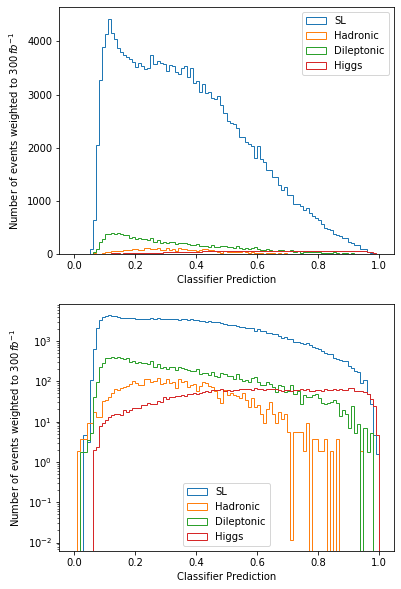

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))

axs[0].hist(x=y_pred[:,3][mask0], bins=bins, weights=Valid_weights[mask0]*3e5*1/0.2,
            histtype='step', label='SL')
axs[0].hist(x=y_pred[:,3][mask1], bins=bins, weights=Valid_weights[mask1]*3e5*1/0.2,
            histtype='step', label='Hadronic')
axs[0].hist(x=y_pred[:,3][mask2], bins=bins, weights=Valid_weights[mask2]*3e5*1/0.2,
            histtype='step', label='Dileptonic')
axs[0].hist(x=y_pred[:,3][mask3], bins=bins, weights=Valid_weights[mask3]*3e5*1/0.2,
            histtype='step', label='Higgs')
axs[0].set_xlabel('Classifier Prediction')
axs[0].set_ylabel('Number of events weighted to $300\,fb^{-1}$')
axs[0].legend(loc='upper right')

axs[1].hist(x=y_pred[:,3][mask0], bins=bins, weights=Valid_weights[mask0]*3e5*1/0.2,
            histtype='step', label='SL')
axs[1].hist(x=y_pred[:,3][mask1], bins=bins, weights=Valid_weights[mask1]*3e5*1/0.2,
            histtype='step', label='Hadronic')
axs[1].hist(x=y_pred[:,3][mask2], bins=bins, weights=Valid_weights[mask2]*3e5*1/0.2,
            histtype='step', label='Dileptonic')
axs[1].hist(x=y_pred[:,3][mask3], bins=bins, weights=Valid_weights[mask3]*3e5*1/0.2,
            histtype='step', label='Higgs')
axs[1].set_xlabel('Classifier Prediction')
axs[1].set_ylabel('Number of events weighted to $300\,fb^{-1}$')
axs[1].legend(loc='lower center')
axs[1].set_yscale('log')

plt.show()
